<a href="https://colab.research.google.com/github/maxkleiner/Bayes_theorem/blob/master/Copy_of_CAS_PML_Analytics_Challange.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Understanding

### HR Analytics - Feature Description

employee_id: Unique ID for employee

department: Department of employee

region: Region of employment (unordered)

education: Education Level

gender: Gender of Employee

recruitment_channel: Channel of recruitment for employee

no_of_trainings: no of other trainings completed in previous year on soft skills, technical skills etc.

age: Age of Employee

previous_year_rating: Employee Rating for the previous year

length_of_service: Length of service in years

KPIs_met >80%: if Percent of KPIs(Key performance Indicators) >80% then 1 else 0

awards_won?: if awards won during previous year then 1 else 0

avg_training_score: Average score in current training evaluations

is_promoted: (Target) Recommended for promotion

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings("ignore")

In [ ]:
df_train = pd.read_csv('train_LZdllcl.csv', sep=',')
df_test = pd.read_csv('test_2umaH9m.csv', sep=',')

print(df_train.shape, df_test.shape)

(54808, 14) (23490, 13)


In [ ]:
df_train.head()

employee_id         department  ... avg_training_score is_promoted
0        65438  Sales & Marketing  ...                 49           0
1        65141         Operations  ...                 60           0
2         7513  Sales & Marketing  ...                 50           0
3         2542  Sales & Marketing  ...                 50           0
4        48945         Technology  ...                 73           0

[5 rows x 14 columns]

In [ ]:
df_test.head()

employee_id         department  ... awards_won? avg_training_score
0         8724         Technology  ...           0                 77
1        74430                 HR  ...           0                 51
2        72255  Sales & Marketing  ...           0                 47
3        38562        Procurement  ...           0                 65
4        64486            Finance  ...           0                 61

[5 rows x 13 columns]

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  KPIs_met >80%         54808 non-null  int64  
 11  awards_won?           54808 non-null  int64  
 12  avg_training_score    54808 non-null  int64  
 13  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.9+ MB


In [ ]:
print("Train : ")
display(df_train.isnull().sum())

Train : 


employee_id                0
department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

Missing Values:

education: 4.4%
previous_year_rating:7.5%

In [ ]:
#Anzahl Feature Ausprägungen
df_train.nunique()

employee_id             54808
department                  9
region                     34
education                   3
gender                      2
recruitment_channel         3
no_of_trainings            10
age                        41
previous_year_rating        5
length_of_service          35
KPIs_met >80%               2
awards_won?                 2
avg_training_score         61
is_promoted                 2
dtype: int64

###Explorative Datenanalyse

Text(0.5, 1.0, 'Ausprägung des Target Feature is_promoted')

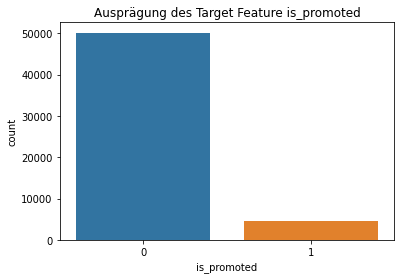

In [ ]:
sns.countplot(x='is_promoted', data = df_train)
plt.title("Ausprägung des Target Feature is_promoted")

sehr unausgeglichenes Trainingsset. 

Nur ~ 8.5% der Mitarbeitenden werden befördert

In [ ]:
#Analyse der unabhängigen Variable "employee_id"
df_train['employee_id'].nunique()

54808

wie bei der Anzahl Feature Ausprägungen bereits gesehen, ist die employee_id der eindeutige Idenfikator für einen Mitarbeiter

Dieses Feature enthält also keine Informationen über eine mögliche Beförderung

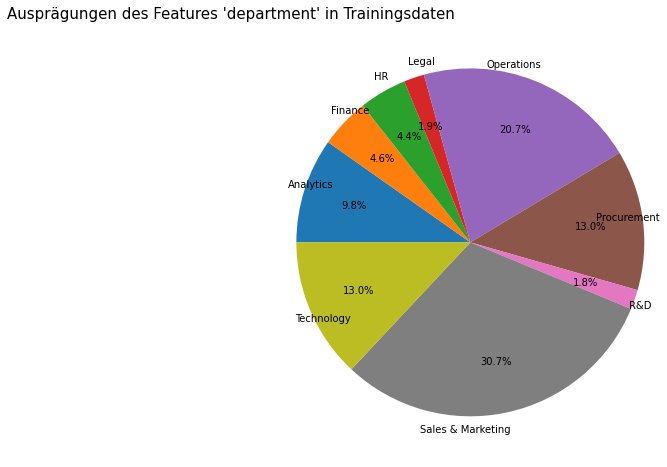

In [ ]:
#Analyse der unabhängigen Variable "department"


plt.figure(figsize=(14,8))
labels = df_train.groupby(['department'])['department'].count().index
plt.pie(df_train.groupby(['department'])['department'].count()/df_train.shape[0] * 100, 
        autopct='%1.1f%%',  labels= labels, pctdistance=0.7)
plt.title("Ausprägungen des Features 'department' in Trainingsdaten", fontsize=15);
plt.xlim(1.5)
plt.show()

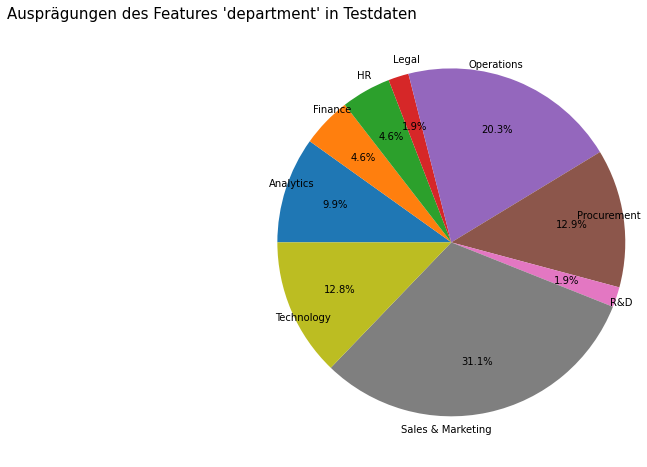

In [ ]:
plt.figure(figsize=(14,8))
labels = df_test.groupby(['department'])['department'].count().index
plt.pie(df_test.groupby(['department'])['department'].count()/df_test.shape[0] * 100, 
        autopct='%1.1f%%',  labels= labels, pctdistance=0.7)
plt.title("Ausprägungen des Features 'department' in Testdaten", fontsize=15);
plt.xlim(1.5)
plt.show()

Die Verteilung der Testdaten ist deren der Testdaten sehr ähnlich

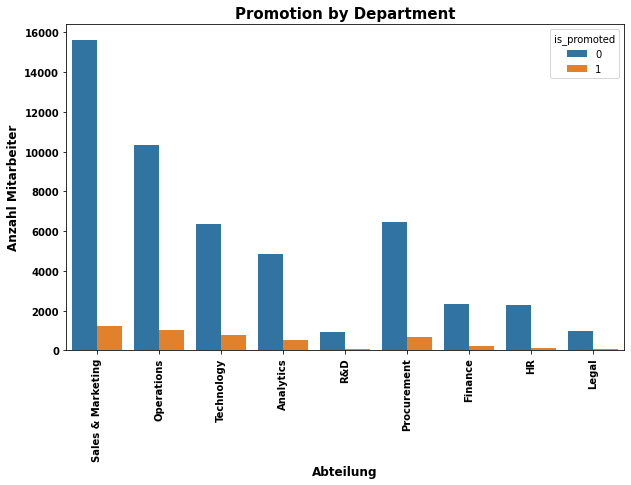

In [ ]:
#Analyse der unabhängigen Variable "Department 
#In Zusammenhang mit dem Target is_promoted"
fig_dims = (10, 6)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot(x=df_train['department'], hue=df_train['is_promoted'])
plt.title('Promotion by Department', fontsize=15, weight='bold')
plt.xlabel('Abteilung', weight='bold', fontsize=12)
plt.ylabel('Anzahl Mitarbeiter', weight='bold', fontsize=12)
plt.xticks(weight='bold', rotation='vertical')
plt.yticks(weight='bold')
plt.show()

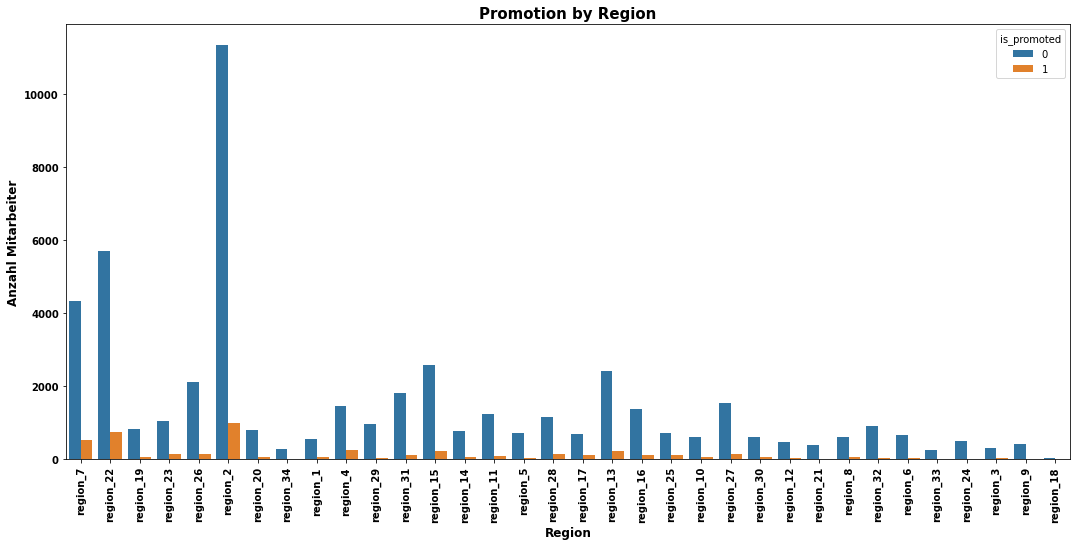

In [ ]:
#Analyse der unabhängigen Variable "Region" 
#In Zusammenhang mit dem Target is_promoted

fig_dims = (18, 8)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot(x=df_train['region'], hue=df_train['is_promoted'])
plt.title('Promotion by Region', fontsize=15, weight='bold')
plt.xlabel('Region', weight='bold', fontsize=12)
plt.ylabel('Anzahl Mitarbeiter', weight='bold', fontsize=12)
plt.xticks(weight='bold', rotation='vertical')
plt.yticks(weight='bold')
plt.show()

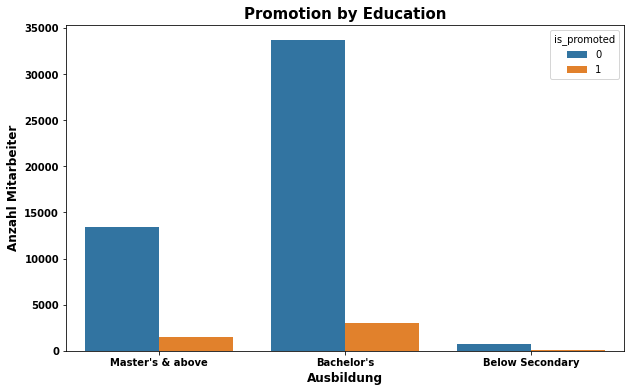

In [ ]:
#Analyse der unabhängigen Variable "Education" in Relation zum Target

fig_dims = (10, 6)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot(x=df_train['education'], hue=df_train['is_promoted'])
plt.title('Promotion by Education', fontsize=15, weight='bold')
plt.xlabel('Ausbildung', weight='bold', fontsize=12)
plt.ylabel('Anzahl Mitarbeiter', weight='bold', fontsize=12)
plt.xticks(weight='bold', rotation='horizontal')
plt.yticks(weight='bold')
plt.show()

In [ ]:
print(df_train['education'].unique())

["Master's & above" "Bachelor's" nan 'Below Secondary']


In [ ]:
#Die bereits entdeckten Missing Values
df_train['education'].isna().sum()

2409

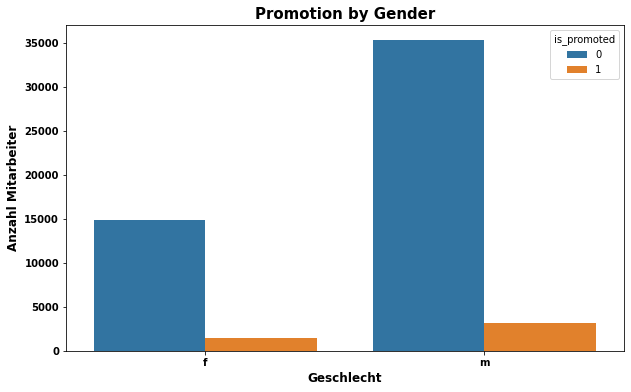

In [ ]:
#Analyse der unabhängigen Variable "Gender" in Relation zum Target

fig_dims = (10, 6)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot(x=df_train['gender'], hue=df_train['is_promoted'])
plt.title('Promotion by Gender', fontsize=15, weight='bold')
plt.xlabel('Geschlecht', weight='bold', fontsize=12)
plt.ylabel('Anzahl Mitarbeiter', weight='bold', fontsize=12)
plt.xticks(weight='bold')
plt.yticks(weight='bold')
plt.show()

In [ ]:
print(df_train['gender'].value_counts())

m    38496
f    16312
Name: gender, dtype: int64


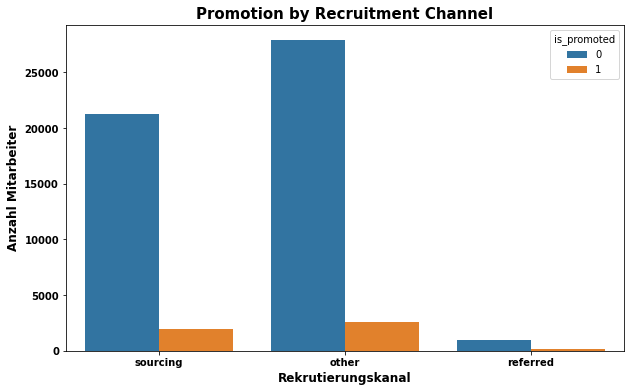

In [ ]:
#Analyse der unabhängigen Variable "Recruitment_Channel"

fig_dims = (10, 6)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot(x=df_train['recruitment_channel'], hue=df_train['is_promoted'])
plt.title('Promotion by Recruitment Channel', fontsize=15, weight='bold')
plt.xlabel('Rekrutierungskanal', weight='bold', fontsize=12)
plt.ylabel('Anzahl Mitarbeiter', weight='bold', fontsize=12)
plt.xticks(weight='bold')
plt.yticks(weight='bold')
plt.show()

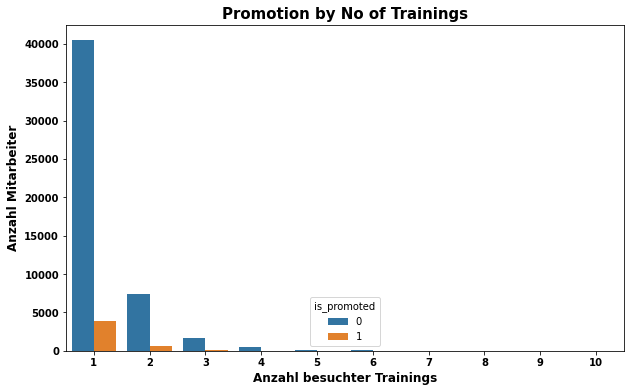

In [ ]:
#Analyse der unabhängigen Variable "No_of_trainings"

fig_dims = (10, 6)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot(x=df_train['no_of_trainings'], hue=df_train['is_promoted'])
plt.title('Promotion by No of Trainings', fontsize=15, weight='bold')
plt.xlabel('Anzahl besuchter Trainings', weight='bold', fontsize=12)
plt.ylabel('Anzahl Mitarbeiter', weight='bold', fontsize=12)
plt.xticks(weight='bold')
plt.yticks(weight='bold')
plt.show()

In [ ]:
print(df_train['no_of_trainings'].value_counts())

1     44378
2      7987
3      1776
4       468
5       128
6        44
7        12
10        5
9         5
8         5
Name: no_of_trainings, dtype: int64


Sehr wenige Mitarbeiter die mehr als 5 Trainings besucht haben. Total 71 (0.12% des Datensatzes).

Allenfalls könnten Levels zusammengefasst werden.

In [ ]:
#Analyse der unabhängigen Variable "Age"
df_train['age'].describe()

count    54808.000000
mean        34.803915
std          7.660169
min         20.000000
25%         29.000000
50%         33.000000
75%         39.000000
max         60.000000
Name: age, dtype: float64

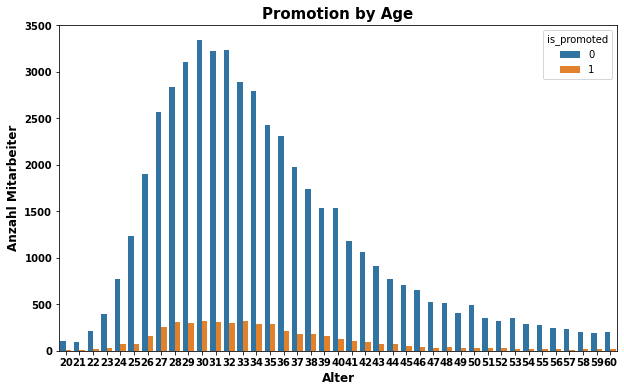

In [ ]:
#die Mitarbeiter liegen zwischen 20-60 Jahren

#Betrachtung in Relation zum Target

fig_dims = (10, 6)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot(x=df_train['age'], hue=df_train['is_promoted'])
plt.title('Promotion by Age', fontsize=15, weight='bold')
plt.xlabel('Alter', weight='bold', fontsize=12)
plt.ylabel('Anzahl Mitarbeiter', weight='bold', fontsize=12)
plt.xticks(weight='bold')
plt.yticks(weight='bold')
plt.show()

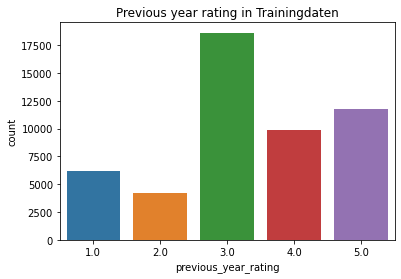

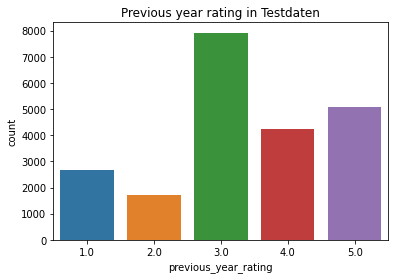

In [ ]:
#Analyse der unabhängigen Variable "Previous_year_rating"
#Betrachtung der Verteilung sowohl in Trainings- soswie Testdaten

sns.countplot(x= 'previous_year_rating', data = df_train)
plt.title("Previous year rating in Trainingdaten")
plt.show()

sns.countplot(x= 'previous_year_rating', data = df_test)
plt.title("Previous year rating in Testdaten")
plt.show()

Auch hier ist die Verteilung der Trainings und Testdaten nahezu identisch

Entgegen meiner Erwartung, ist die Bewertung (previous year rating) nicht normalverteilt

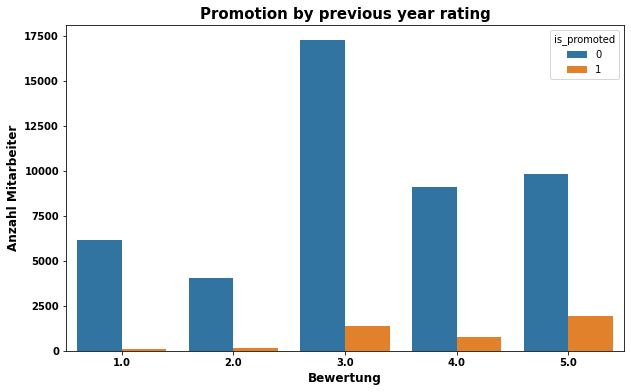

In [ ]:
#Betrachtung des Features in Relation zum Target

fig_dims = (10, 6)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot(x=df_train['previous_year_rating'], hue=df_train['is_promoted'])
plt.title('Promotion by previous year rating', fontsize=15, weight='bold')
plt.xlabel('Bewertung', weight='bold', fontsize=12)
plt.ylabel('Anzahl Mitarbeiter', weight='bold', fontsize=12)
plt.xticks(weight='bold')
plt.yticks(weight='bold')
plt.show()

In [ ]:
print(df_train['previous_year_rating'].unique())

#Die bereits entdeckten Missing Values
df_train['previous_year_rating'].isna().sum()

[ 5.  3.  1.  4. nan  2.]


4124

In [ ]:
print(df_train['employee_id'].where(df_train['length_of_service']<=1 
                     & df_train['previous_year_rating'].isna()).count())

4124


Alle 4124 Mitarbeiter, welche eine Fehlender Bewertung haben, arbeiten weniger oder genau ein Jahr in der Firma, daher wurde noch keine Bewertung in der Vergangenheit gemacht.

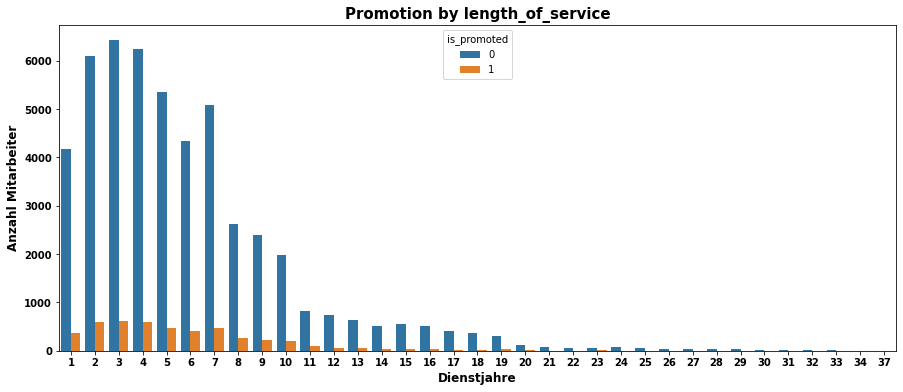

In [ ]:
#Analyse der unabhängigen Variable "Length_of_service"

fig_dims = (15, 6)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot(x=df_train['length_of_service'], hue=df_train['is_promoted'])
plt.title('Promotion by length_of_service', fontsize=15, weight='bold')
plt.xlabel('Dienstjahre', weight='bold', fontsize=12)
plt.ylabel('Anzahl Mitarbeiter', weight='bold', fontsize=12)
plt.xticks(weight='bold')
plt.yticks(weight='bold')
plt.show()

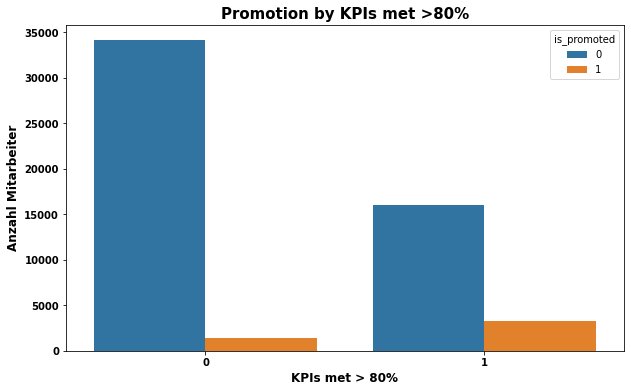

In [ ]:
#Analyse der unabhängigen Variable "KPIs_met >80%"

fig_dims = (10, 6)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot(x=df_train['KPIs_met >80%'], hue=df_train['is_promoted'])
plt.title('Promotion by KPIs met >80%', fontsize=15, weight='bold')
plt.xlabel('KPIs met > 80%', weight='bold', fontsize=12)
plt.ylabel('Anzahl Mitarbeiter', weight='bold', fontsize=12)
plt.xticks(weight='bold')
plt.yticks(weight='bold')
plt.show()

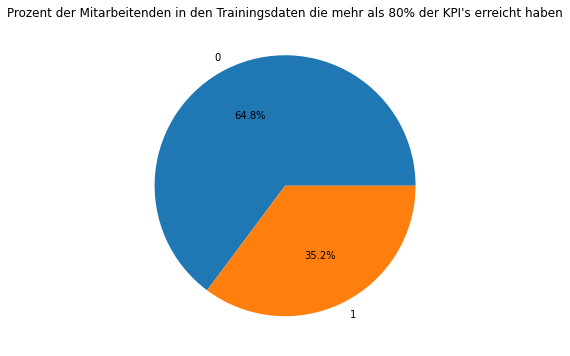

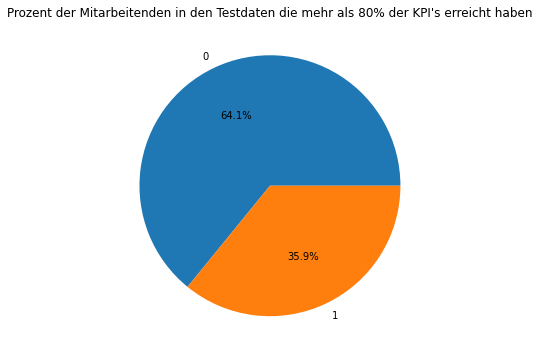

In [ ]:
plt.figure(figsize=(10,6))
labels = df_train.groupby(['KPIs_met >80%'])['KPIs_met >80%'].count().index
plt.pie(df_train.groupby(['KPIs_met >80%'])['KPIs_met >80%'].count()/df_train.shape[0] * 100, autopct='%1.1f%%',  labels= labels)
plt.title("Prozent der Mitarbeitenden in den Trainingsdaten die mehr als 80% der KPI's erreicht haben")
plt.show()

plt.figure(figsize=(10,6))
labels = df_test.groupby(['KPIs_met >80%'])['KPIs_met >80%'].count().index
plt.pie(df_test.groupby(['KPIs_met >80%'])['KPIs_met >80%'].count()/df_test.shape[0] * 100, autopct='%1.1f%%',  labels= labels)
plt.title("Prozent der Mitarbeitenden in den Testdaten die mehr als 80% der KPI's erreicht haben")
plt.show()

Auch in diesem Feature ist die Verteilung in Trainings und Testdaten identisch

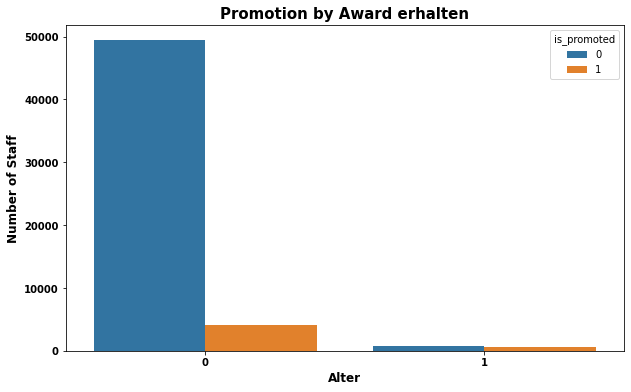

In [ ]:
#Analyse der unabhängigen Variable "awards_won?"
#In Relation zum Target

fig_dims = (10, 6)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot(x=df_train['awards_won?'], hue=df_train['is_promoted'])
plt.title('Promotion by Award erhalten', fontsize=15, weight='bold')
plt.xlabel('Alter', weight='bold', fontsize=12)
plt.ylabel('Number of Staff', weight='bold', fontsize=12)
plt.xticks(weight='bold')
plt.yticks(weight='bold')
plt.show()

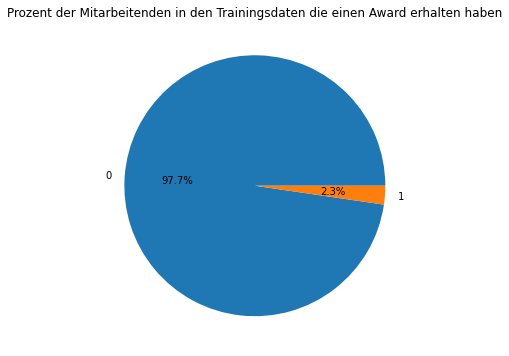

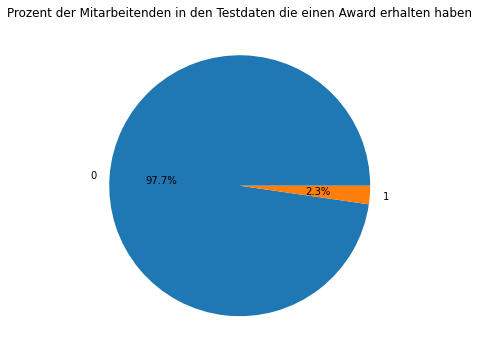

In [ ]:
plt.figure(figsize=(10,6))

labels = df_train.groupby(['awards_won?'])['awards_won?'].count().index
plt.pie(df_train.groupby(['awards_won?'])['awards_won?'].count()/df_train.shape[0] * 100, autopct='%1.1f%%',  labels= labels)
plt.title("Prozent der Mitarbeitenden in den Trainingsdaten die einen Award erhalten haben")
plt.show()

plt.figure(figsize=(10,6))

labels = df_test.groupby(['awards_won?'])['awards_won?'].count().index
plt.pie(df_test.groupby(['awards_won?'])['awards_won?'].count()/df_test.shape[0] * 100, autopct='%1.1f%%',  labels= labels)
plt.title("Prozent der Mitarbeitenden in den Testdaten die einen Award erhalten haben")
plt.show()

Nur sehr wenige Mitarbeiter haben einen Award bekommen. Verteilung in Training und Testdaten exakt gleicht. 

Aufgrund der nahezu identischen Verteilung in Training und Testdaten vermute ich, dass die Verteilung beim splitten berücksichtigt wurde

In [ ]:
#Analyse der unabhängigen Variable "avg_training_score:"

df_train['avg_training_score'].describe()

count    54808.000000
mean        63.386750
std         13.371559
min         39.000000
25%         51.000000
50%         60.000000
75%         76.000000
max         99.000000
Name: avg_training_score, dtype: float64

In [ ]:
df_test['avg_training_score'].describe()

count    23490.000000
mean        63.263133
std         13.411750
min         39.000000
25%         51.000000
50%         60.000000
75%         76.000000
max         99.000000
Name: avg_training_score, dtype: float64

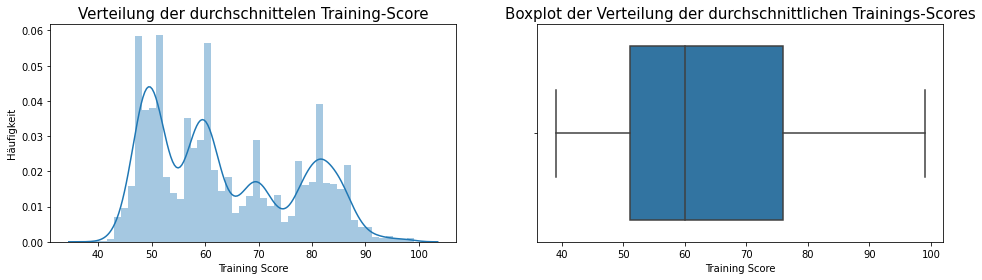

In [ ]:
#Plots der Verteilung des durchschnittlichen Trainingsscores
plt.figure(figsize=(16,4))

plt.subplot(1,2,1)
sns.distplot(df_train['avg_training_score'] )
plt.xlabel("Training Score")
plt.ylabel("Häufigkeit")
plt.title("Verteilung der durchschnittelen Training-Score", fontsize = 15)

plt.subplot(1,2,2)
sns.boxplot(df_train['avg_training_score'])
plt.xlabel("Training Score")
plt.title("Boxplot der Verteilung der durchschnittlichen Trainings-Scores", fontsize = 15)


plt.show()

Keine Ausreisser. Auch die durchschnittlichen Training-Scores sind nicht Normalverteilt.

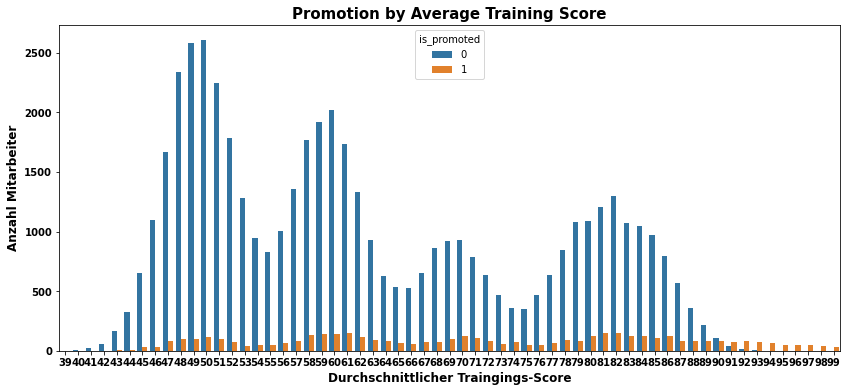

In [ ]:
fig_dims = (14, 6)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot(x=df_train['avg_training_score'], hue=df_train['is_promoted'])
plt.title('Promotion by Average Training Score', fontsize=15, weight='bold')
plt.xlabel('Durchschnittlicher Traingings-Score', weight='bold', fontsize=12)
plt.ylabel('Anzahl Mitarbeiter', weight='bold', fontsize=12)
plt.xticks(weight='bold', rotation='horizontal')
plt.yticks(weight='bold')
plt.show()

Scheint ein wichtiges Feature für die Vorhersage des Targets zu sehen, da insbesondere bei hohen Werten verhältnismässig viele Mitarbeiter befördert wurden.

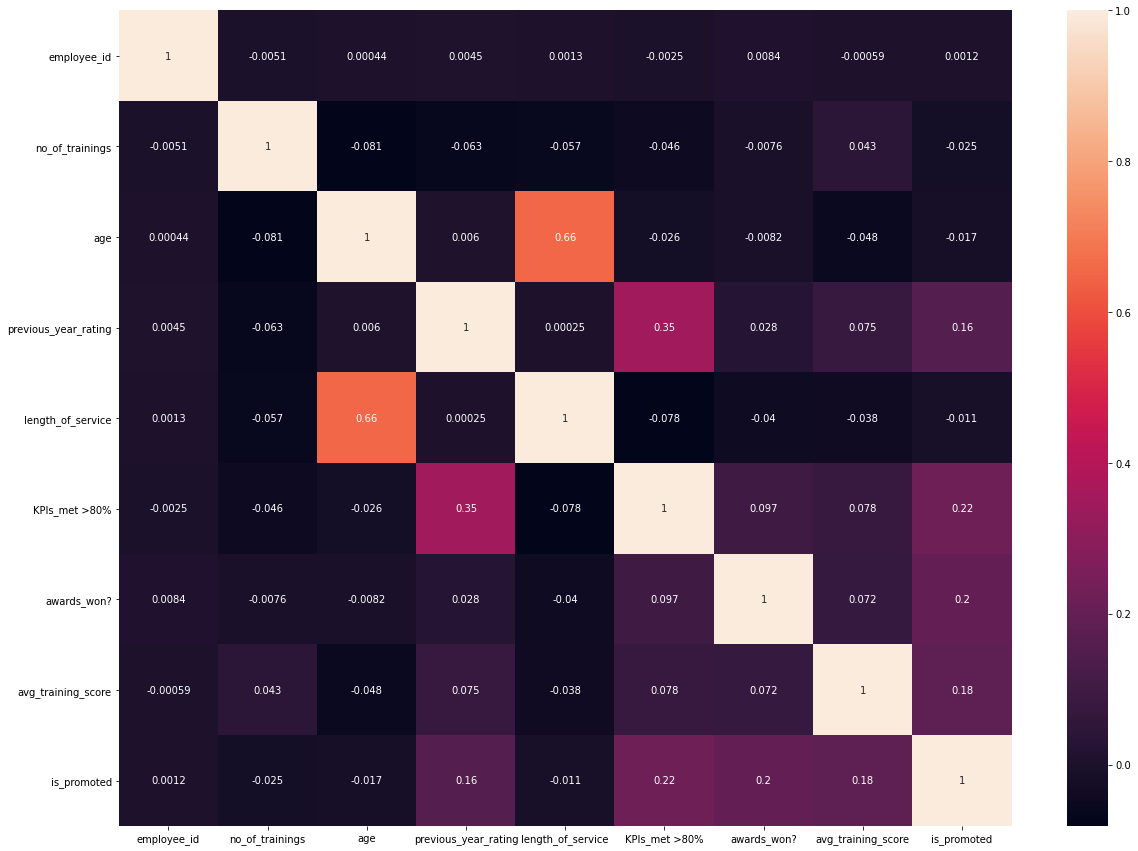

In [ ]:
#Korrelationsmatrix zwischen Features und dem Target is_promoted


plt.subplots(figsize=(20,15))
sns.heatmap(df_train.corr(), annot = True)

Ausser zwischen dem Alter und den Dienstjahren gibt es keine mittlere oder starke Korrelationen zwischen den einzelnen Features, wodurch wohl alle für die Prognose mit einbezogen werden können. 

Die Korrelationsmatrix bestätigt: 
- Die employee_id hat eigentlich kein Relevanz für das Target

In [ ]:
#Visualisierung aus der Libary Plotly Expresss um die Zusammenhänge der einzelnen Featureausprägungen sowie dem Zusammeng mit einer Beförderung darzustellen

# mit department viel zu unübersichtlich, deshalb wird dieser Feature für diese Visualisierung exkludiert

fig = px.parallel_categories(df_train[['department','education','gender','previous_year_rating','KPIs_met >80%',
                                    'recruitment_channel',
                                   'is_promoted']], 
                                    color="is_promoted", color_continuous_scale=px.colors.sequential.Cividis,
                                    )   
fig.show()


# Data Preperation

In [ ]:
import sklearn as sk

from sklearn.preprocessing import RobustScaler
from sklearn import preprocessing 


In [ ]:
print(df_train.shape, df_test.shape)

(54808, 14) (23490, 13)


In [ ]:
df_train_prep = df_train.copy()
df_test_prep = df_test.copy()

print(df_train_prep.shape, df_test_prep.shape)

(54808, 14) (23490, 13)


In [ ]:
#Checken von Dubletten:

def remove_duplicates(data):
    
    print("Anzahl Zeilen vor Dublettencheck = ",data.shape[0])
    data.drop_duplicates(keep="first", inplace=True) 
    print("Anzahl Zeilen nach Dublettencheck = ",data.shape[0])
    
    return "Doppelte Einträge kontrolliert"

# Entfernen doppelter Einträge mittels drop Funktion aus Pandas
remove_duplicates(df_train_prep)

Anzahl Zeilen vor Dublettencheck =  54808
Anzahl Zeilen nach Dublettencheck =  54808


'Doppelte Einträge kontrolliert'

In [ ]:
remove_duplicates(df_test_prep)

Anzahl Zeilen vor Dublettencheck =  23490
Anzahl Zeilen nach Dublettencheck =  23490


'Doppelte Einträge kontrolliert'

In [ ]:
#Viele ML Algorithmen können nicht mit Missing Values umgehen, 
#daher müssen diese entfernt oder imputiert werden:

In [ ]:
df_train_prep.isnull().sum()

employee_id                0
department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

In [ ]:
df_test_prep.isnull().sum()

employee_id                0
department                 0
region                     0
education               1034
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    1812
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
dtype: int64

In [ ]:
#Missing Values in education
df_train_prep['education'].describe()

count          52399
unique             3
top       Bachelor's
freq           36669
Name: education, dtype: object

In [ ]:
df_test_prep['education'].describe()

count          22456
unique             3
top       Bachelor's
freq           15578
Name: education, dtype: object

In [ ]:
#der Modus der Ausbildung (Bachelor's) kommt mehr mehr als 50% vor. 
#Daher werden die fehlenden Werte durch den Modus imputiert
df_train_prep['education'].fillna('Bachelor\'s', inplace=True)
df_test_prep['education'].fillna('Bachelor\'s', inplace=True)

In [ ]:
#Missing Values in previous_year_rating

print(df_train_prep['employee_id'].where(df_train_prep['length_of_service']<=1 
                     & df_train_prep['previous_year_rating'].isna()).count())
print(df_test_prep['employee_id'].where(df_test_prep['length_of_service']<=1 
                     & df_test_prep['previous_year_rating'].isna()).count())

4124
1812


In [ ]:
#Die 4124/1812 Mitarbeitenden, welche über keine Bewertung aus dem Vorjahr verfügen, 
#arbeiten noch nicht genug lang in der Firma, um bereits ein Rating erhalten zu haben.

#Daher wird der Wert 0 imputiert, da wir deren Leistung noch nicht einschätzen können.
#Es wäre auch möglich gewesen durch de Modus(3) zu imputieren.

In [ ]:
df_train_prep['previous_year_rating'].where(df_train_prep['length_of_service']>=1).fillna(0, inplace = True)
df_test_prep['previous_year_rating'].where(df_test_prep['length_of_service']>=1).fillna(0, inplace = True)

In [ ]:
df_train_prep.isnull().sum()

employee_id             0
department              0
region                  0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
KPIs_met >80%           0
awards_won?             0
avg_training_score      0
is_promoted             0
dtype: int64

In [ ]:
df_test_prep.isnull().sum()

employee_id             0
department              0
region                  0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
KPIs_met >80%           0
awards_won?             0
avg_training_score      0
dtype: int64

In [ ]:
#die Employee ID dient lediglich zu Identifikation des Mitarbeitenden 
#und liefert daher keine für die Beförderung relevanten Informationen

#Train
df_train_prep = df_train_prep.drop(['employee_id'],axis=1)

#Test
df_test_prep = df_test_prep.drop(['employee_id'],axis=1)

df_train_prep.head()

department     region  ... avg_training_score is_promoted
0  Sales & Marketing   region_7  ...                 49           0
1         Operations  region_22  ...                 60           0
2  Sales & Marketing  region_19  ...                 50           0
3  Sales & Marketing  region_23  ...                 50           0
4         Technology  region_26  ...                 73           0

[5 rows x 13 columns]

In [ ]:
#Bei education handelt es sich um ein ordinales Merkmal 
#weshalb es aufsteigend numeriert wird.

#Train
df_train_prep['education'].replace("Master's & above",2,inplace=True)
df_train_prep['education'].replace("Bachelor's",1,inplace=True)
df_train_prep['education'].replace("Below Secondary",0,inplace=True)

#Test
df_test_prep['education'].replace("Master's & above",2,inplace=True)
df_test_prep['education'].replace("Bachelor's",1,inplace=True)
df_test_prep['education'].replace("Below Secondary",0,inplace=True)

df_train_prep.head()

department     region  ...  avg_training_score is_promoted
0  Sales & Marketing   region_7  ...                  49           0
1         Operations  region_22  ...                  60           0
2  Sales & Marketing  region_19  ...                  50           0
3  Sales & Marketing  region_23  ...                  50           0
4         Technology  region_26  ...                  73           0

[5 rows x 13 columns]

Da die meisten Machine Learning Algorithmen nicht mit nominalen Input umgehen können sondern numerischen Input benötigen, werden die noch numerischen/kategorialen Features Dummy kodiert. 

In [ ]:
#Train
df_train_prep = pd.get_dummies(df_train_prep,columns=['department','region', 'gender','recruitment_channel'],drop_first=True)
#Test
df_test_prep = pd.get_dummies(df_test_prep,columns=['department','region', 'gender','recruitment_channel'],drop_first=True)

df_train_prep.head()

education  ...  recruitment_channel_sourcing
0          2  ...                             1
1          1  ...                             0
2          1  ...                             1
3          1  ...                             0
4          1  ...                             0

[5 rows x 53 columns]

##Feature Engineering

Auf binnen des Alters wird vorerst verzichtet 

Es gibt keine Optimale Anzahl bins, Autoren sind sich einig -> Try&Error (siehe Vorlesungsfolien Feature Eng- S.99) 

Durch das spätere normalisieren, wird die Streuung des Alters zudem noch etwas realtiviert.

Es werden aufgrund der kleinen Anzahl an Features, sowie des fehlenden linearen Zusammenhangs (Ausser Alter und Dienstjahre) unter den Features (siehe Korrelationsmatrix) alle Features für die Modellberechnung verwendet.

###Train - Test - Split

Auf einen Train-Test Split der Trainingsdaten wird verzichtet, da dies in Tests zu einer schlechteren Performance geführt hat. Da die Feature Ausprägungen im Train sowie im Test Datensatz identisch sind, sollte zudem die Gefahr des Overfitting nicht sehr gross sein.

Weiter wird auf ein Ausgleichen des Datensatzes aufgrund der ungleichen Verteilung des Targets verzichtet, da dies in Tests ebenfalls keine Relevanz auf die Performance (F1-Score) hatte.

Dies wurde mit der Funktion RandomOverSampler aus der Bibliothek imblearn.over_sampling getestet.


In [ ]:
#Feature-Target-Split für die Testdaten
X = df_train_prep.drop('is_promoted',axis=1)
y = df_train_prep['is_promoted']

#Vorbereiten der Test-/Validierungsdaten für Prognose
X_test = df_test_prep

Nun werden die Werte der Features mittels der Funktion RobustScaler() normalisiert, damit die unterschiedlichen Grösseneinheiten (0/1 bis 20-60 beim Alter) nicht eine so grossen Einfluss auf den Learner hat.

Dabei werden die Werte um 0 zentriert. Mittels RobustScaler wurden die Beste Performance erziehlt. 

In [ ]:

scaler = preprocessing.RobustScaler() 


X_standard = scaler.fit_transform(X) 
X_standard = pd.DataFrame(X_standard, columns = X.columns) 

X_test_standard = scaler.fit_transform(X_test) 
X_test_standard = pd.DataFrame(X_test_standard, columns = X_test.columns) 

X_standard.head()

education  ...  recruitment_channel_sourcing
0        1.0  ...                           1.0
1        0.0  ...                           0.0
2        0.0  ...                           1.0
3        0.0  ...                           0.0
4        0.0  ...                           0.0

[5 rows x 52 columns]

# Modelling

In [ ]:
!pip3 install catboost

     |████████████████████████████████| 65.7MB 57kB/s 


In [ ]:
from collections import Counter
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from xgboost.sklearn import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.experimental import enable_hist_gradient_boosting


from sklearn import metrics
from sklearn.model_selection import cross_val_score

In [ ]:
#Setzten eines Random Seeds um Ergebnisse vergleich zu machen
np.random.seed(1234)

###Erster Performance Check


Beim verwenden des F1-Scores werden die Default werte für die Gewichtung der beiden Fehler belassen. Zum einen, da dies zu einem ausgeglichenerem und dadurch besseren Ergebnis führt. Zum anderen da die beiden Fehler grundsätzlich beide sehr negativ zu betrachten sind (siehe Begründung bericht).

In [ ]:
%%time 
# search for an optimal value of K for KNN
k_range = list(range(1, 5))
k_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_standard, y, cv=10, scoring='f1')
    k_scores.append(scores.mean())
print(k_scores)

[0.23393820514538216, 0.10602364993081637, 0.16296996406478742, 0.07704052589005736]


In [ ]:
%%time
# 10-fold cross-validation with logistic regression
logreg = LogisticRegression()
print(cross_val_score(logreg, X_standard, y, cv=10, scoring='f1').mean())

0.3768156220584791
CPU times: user 17.8 s, sys: 6.76 s, total: 24.5 s
Wall time: 12.5 s


In [ ]:
%%time
# 10-fold cross-validation with Decision Tree
DTC = DecisionTreeClassifier()
print(cross_val_score(DTC, X_standard, y, cv=10, scoring='f1').mean())

0.43418675397961815
CPU times: user 3.82 s, sys: 4.99 ms, total: 3.82 s
Wall time: 3.85 s


In [ ]:
%%time
# 10-fold cross-validation with Random Forest
RFC = RandomForestClassifier(n_estimators = 100)
print(cross_val_score(RFC, X_standard, y, cv=10, scoring='f1').mean())

0.44328737682964786
CPU times: user 1min 5s, sys: 402 ms, total: 1min 6s
Wall time: 1min 6s


In [ ]:
%%time
# 10-fold cross-validation with Ada Boost Classifier
ADA = AdaBoostClassifier()
print(cross_val_score(ADA, X_standard, y, cv=10, scoring='f1').mean())

0.28146471150825325
CPU times: user 25.1 s, sys: 285 ms, total: 25.4 s
Wall time: 25.4 s


In [ ]:
%%time
# 10-fold cross-validation with Gradient Boosting Classifier
GBC = GradientBoostingClassifier()
print(cross_val_score(GBC, X_standard, y, cv=10, scoring='f1').mean())

0.449430934872458
CPU times: user 1min 15s, sys: 167 ms, total: 1min 15s
Wall time: 1min 16s


In [ ]:
%%time
# 10-fold cross-validation with Cat Boost Classifier
CBC = CatBoostClassifier(silent=True)
print(cross_val_score(CBC, X_standard, y, cv=10, scoring='f1').mean())

0.5107053519025566
CPU times: user 6min 19s, sys: 40 s, total: 6min 59s
Wall time: 3min 37s


In [ ]:
%%time
# 10-fold cross-validation LightGBM Classifier
from lightgbm import LGBMClassifier
LGBMC = LGBMClassifier()
print(cross_val_score(LGBMC, X_standard, y, cv=10, scoring='f1').mean())

0.5044559170050329
CPU times: user 7.61 s, sys: 72.5 ms, total: 7.68 s
Wall time: 7.69 s


In [ ]:
%%time 
# 10-fold cross-validation XG Boost Classifier
from xgboost.sklearn import XGBClassifier
XGBC = XGBClassifier(objective = "binary:logistic",
               eval_metric = "logloss")

print(cross_val_score(XGBC, X_standard, y, cv=10, scoring='f1').mean())

0.4227083777475615
CPU times: user 1min 2s, sys: 63.3 ms, total: 1min 2s
Wall time: 1min 2s


Unterschied zwischen Googel Colab und Lokal. Lokal mit gleichem Seed, ergibt xgboost eine Performance von 0.511, ansonsten gab es in der Performance keine Abweichungen.

Da die Performance mit dem XGBClassifier lokal am besten war, wurde mit diesem weitergearbeitet und versucht die idealen Parameter zu evaluieren.

##Parameter Tuning von XGBC mittels GridSearch

erste Tuning Versuche rechneten sehr lang, lieferten aber schlechtere Performance. Allenfalls hätte es Sinn gemacht, nicht auf der gesamten Datenmenge zu rechnen.

In [ ]:
## XGBoost parameter optimizing
#from sklearn.model_selection import GridSearchCV
#
## parameter grid
#param_grid = {
#              "learning_rate": [0.05, 0.1, 0.2],
#              "min_child_weight": [5, 8],
#              "gamma" : [0],
#              "reg_alpha": [0.01, 0.1, 1],
#              "subsample": [0.5, 0.8],
#              'n_estimators': [400, 600],
#              'max_depth' : [5, 8],
#              "colsample_bytree" : [0.8],
#              "eval_metric" : ['error']
#              }
#
#
## StratifiedKfold
#from sklearn.model_selection import StratifiedKFold 
#strkfold = StratifiedKFold(n_splits=5, random_state=0, shuffle=True)
#
#### Creation of Base model ###
#from xgboost import XGBClassifier
#xgbc = XGBClassifier(booster = 'gbtree', random_state = 0 )
#
## Grid Search 
#grid_search = GridSearchCV(estimator = xgbc, param_grid = param_grid, cv = strkfold, scoring='f1', error_score=0, n_jobs = -1, verbose = 2)

In [ ]:
#%%time
## Evaluieren the optimal Parameter for 
#grid_search.fit(X_standard, y)
#print(grid_search.best_params_)
#print(grid_search.best_score_)

Output:
'colsample_bytree': 0.8, 'eval_metric': 'error', 'gamma': 0, 'learning_rate': 0.2, 'max_depth': 5, 'min_child_weight': 8, 'n_estimators': 600, 'reg_alpha': 0.1, 'subsample': 0.5}
0.5100011836989812
Wall time: 2h 39min 26s

Dieser GridSearch rechnete rund 2.5 Stunden, lieferte aber schlechtere Werte als ohne Parameter mitzugeben (0.505 statt 0.511 ohne Parameter).

In [ ]:
XGBC2 = XGBClassifier(colsample_bytree= 0.8,
                     eval_metric = "error",
                     gamma = 0,
                     learning_rate = 0.2,
                     max_depth = 5,
                     min_child_weight = 8,
                     n_estimators = 600,
                     reg_alpha = 0.1,
                     subsample = 0.5
                    )


print(cross_val_score(XGBC2, X_standard, y, cv=10, scoring='f1').mean())

0.5027387512271484


Auch die die Abgabe im Solution Checker der Challange lieferte sehr schlechte Resultate.

Ein weiterer Parameter Tuning Versuch: 

In [ ]:
#from sklearn.model_selection import GridSearchCV
#from xgboost.sklearn import XGBClassifier
#
#param_test4 = {
#  'min_child_weight':[5,6],
#  'max_depth': range(3,10,2),
#  'n_estimators':[150,200,300,400],
#  'scale_pos_weight':[1,2,3,4],
#  'colsample_bytree':[0.7,0.8], 
#  'subsample':[0.7,0.8],
#  
#}
#gsearch4 = GridSearchCV(estimator = XGBClassifier(learning_rate=0.1, n_estimators=150, max_depth=5,
# min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
# objective= 'binary:logistic', nthread=4, scale_pos_weight=3,seed=27), 
# param_grid = param_test4, scoring='f1',n_jobs=4,iid=False, cv=5)
#gsearch4.fit(X_standard, y)

In [ ]:
#print("gsearch4.best_params_",gsearch4.best_params_)
#Output: gsearch4.best_params_ {'colsample_bytree': 0.8, 'max_depth': 5, 'min_child_weight': 5, 'n_estimators': 150, 'scale_pos_weight': 3, 'subsample': 0.8}

In [ ]:
#Dieser Versuch rechnete unglaublich lange (länger als eine Nacht), di Parameter ergaben bisher aus allen Tuningversuchen mittels GridSearchCV das beste Ergebnis : 

XGBC3 = XGBClassifier(learning_rate=0.1, n_estimators=150, max_depth=5,
 min_child_weight=5, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=3, eval_metric = "logloss")

print(cross_val_score(XGBC3, X_standard, y, cv=10, scoring='f1').mean())

0.5230170473861684


Spannenderweise gibt es bei den optimierten XGBC Modelle keine Diskrepanzen wie bei dem ohne Parameter zwischen lokal/colab

##Trainieren des Modells

In [ ]:
XGBC3.fit(X_standard, y)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.8, eval_metric='logloss',
              gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=5,
              min_child_weight=5, missing=None, n_estimators=150, n_jobs=1,
              nthread=4, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=3, seed=None,
              silent=None, subsample=0.8, verbosity=1)

## Prognose auf Testdaten

In [ ]:
prediction_XGBC3 = XGBC3.predict(X_test_standard)

## Submission File für Evaluation 

In [ ]:
#Erstellen des Submission Files für die Eingabe am DataHack um das Resultat zu evaluieren

In [ ]:
submissionXGBC3 = pd.DataFrame({'employee_id': df_test['employee_id'],
                          'is_promoted': prediction_XGBC3})
#In der Abgabe muss sowohl die Employee_ID sowie das Target is_promoted als Integer formatiert sein
submissionXGBC3['is_promoted'] = submissionXGBC3['is_promoted'].apply(np.int64) 
submissionXGBC3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23490 entries, 0 to 23489
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   employee_id  23490 non-null  int64
 1   is_promoted  23490 non-null  int64
dtypes: int64(2)
memory usage: 367.2 KB


In [ ]:
submissionXGBC3.to_csv("solutionXGBC3.csv",index=False)

Bei der Validierung im Solution Checker des HR Analytics Hack ergab das Ergebnis eine Performance von 0.508474576271187.

Bisher ist das bein bestes Ergebnis, welches mich auf den 455 Rang von3264 Teilnehmer des öffentlichen Leaderboards bringt. Mein Ziel, die vordere Hälfte des Leaderboards zu erreichen, habe ich daher erreicht. Ich versuche aber nun noch mit anderen Classifier durch Tuning, eventuell auf bessere Ergebnisse zu kommen. 

Zudem habe ich weitere spannende Ansäätze gesehen indem verschiedene Classifier mittels Voting verknüpft werden, dies werde ich ebenfalls auch noch ausprobieren. 